Supervised learning: 

- Regression: predict continuous variable
- Classification: predict discrete (categorical) varable

### Logistic Regression (Logit)

Sigmoid function
$$y = \frac{1}{1 + exp(-theta * x - b)}$$
<!-- $$f = theta*x + b$$ -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

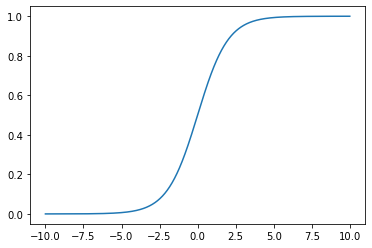

In [3]:
f = np.linspace(-10, 10, 1000)
y = sigmoid(f)
plt.plot(f, y);

In [4]:
default_prob = np.random.uniform(size=100)
default_prob

array([0.40686682, 0.87729794, 0.61708989, 0.90854775, 0.64874377,
       0.19784947, 0.26390945, 0.60979656, 0.80681183, 0.76319377,
       0.68472129, 0.26791741, 0.22546339, 0.98846828, 0.24154858,
       0.44139679, 0.64348976, 0.29409254, 0.60897763, 0.85235839,
       0.07043821, 0.72805474, 0.80440789, 0.41686355, 0.65363312,
       0.13864878, 0.82729211, 0.90600089, 0.35469302, 0.73193625,
       0.28269904, 0.52097587, 0.13645079, 0.36030328, 0.26771414,
       0.76648934, 0.00359985, 0.75273218, 0.67267419, 0.96124611,
       0.33681262, 0.60970192, 0.1586122 , 0.09038139, 0.95663839,
       0.32795626, 0.04449402, 0.28387437, 0.54532759, 0.36786191,
       0.21982012, 0.04541378, 0.06504407, 0.69452379, 0.47647259,
       0.49867605, 0.19915518, 0.03145329, 0.28904783, 0.50823719,
       0.07951411, 0.00488451, 0.34884362, 0.913376  , 0.61341642,
       0.26019194, 0.58725539, 0.85996726, 0.32417745, 0.17911721,
       0.78431372, 0.15552496, 0.31136738, 0.40526525, 0.69306

In [5]:
thresh = 0.7
np.where(default_prob > thresh, 1, 0)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [33]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes, load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = load_breast_cancer()

In [8]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['y'] = data['target'] # 0:'malignant', 1:'benign'

In [9]:
pd.options.display.max_columns = 100

In [10]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
df['y'] = df.y.map({1:0, 0:1})

In [12]:
df.y.value_counts()

0    357
1    212
Name: y, dtype: int64

In [13]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

In [14]:
df.duplicated().sum()

0

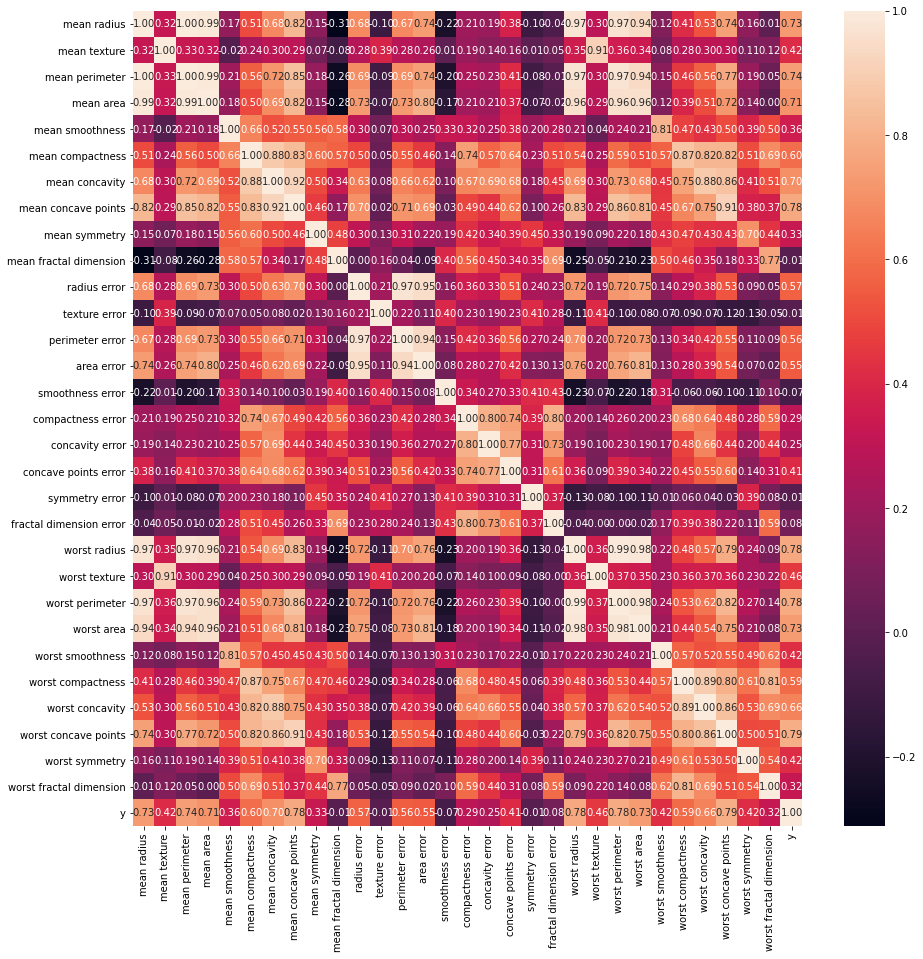

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), fmt='.2f', annot=True);

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), df.y, test_size=0.1, stratify=df.y)

In [17]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/Users/anaconda3/envs/nmtruong/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [18]:
X_test.shape

(57, 30)

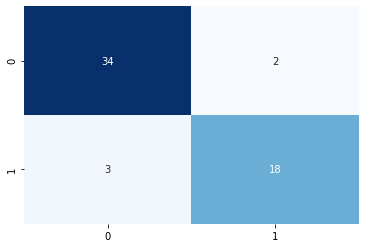

In [19]:
confusion_matrix = confusion_matrix(y_test, logistic.predict(X_test))
sns.heatmap(confusion_matrix, fmt='d', annot=True, cmap='Blues', cbar=False);

In [20]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.90      0.86      0.88        21

    accuracy                           0.91        57
   macro avg       0.91      0.90      0.90        57
weighted avg       0.91      0.91      0.91        57



![](https://i.pinimg.com/originals/7e/2c/10/7e2c1013b0e423fc6b0440ddba82a1bf.png)

![](https://i.pinimg.com/originals/7d/49/d5/7d49d532ebbdd5247f121adfbe77b688.jpg)

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
logistic_cv = LogisticRegressionCV(cv=5)

logistic_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5)

In [30]:
print(classification_report(y_train, logistic_cv.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       321
           1       0.97      0.96      0.97       191

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [31]:
print(classification_report(y_test, logistic_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.94      0.81      0.87        21

    accuracy                           0.91        57
   macro avg       0.92      0.89      0.90        57
weighted avg       0.91      0.91      0.91        57



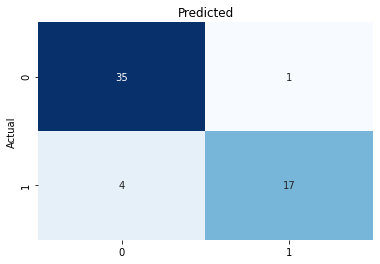

In [35]:
confusion_mat = confusion_matrix(y_test, logistic_cv.predict(X_test))
sns.heatmap(confusion_mat, fmt='d', annot=True, cmap='Blues', cbar=False)
plt.title('Predicted')
plt.ylabel('Actual');

In [36]:
print(classification_report(y_test, logistic_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.94      0.81      0.87        21

    accuracy                           0.91        57
   macro avg       0.92      0.89      0.90        57
weighted avg       0.91      0.91      0.91        57



In [37]:
logistic_cv.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [54]:
logistic_cv.predict_proba(X_test)[:, 1]

array([6.80046407e-03, 1.03425570e-05, 2.36706626e-03, 2.33431328e-03,
       4.76727936e-04, 9.99995203e-01, 9.99999999e-01, 6.64854075e-02,
       2.03930876e-03, 9.96012621e-01, 9.99942859e-01, 2.15594278e-03,
       7.23787470e-05, 2.49111023e-01, 9.99998689e-01, 3.98050784e-04,
       9.99994512e-01, 9.13534289e-03, 2.23989376e-05, 1.00000000e+00,
       1.00000000e+00, 7.93953669e-01, 9.99999848e-01, 4.95406302e-01,
       1.90947258e-02, 1.76154159e-05, 1.00000000e+00, 6.71008777e-02,
       9.93790325e-01, 2.28176357e-02, 6.43612805e-04, 4.21594712e-05,
       2.73589356e-03, 2.49690617e-03, 1.37287599e-01, 8.46970211e-02,
       1.93093874e-02, 3.80089821e-03, 4.84621675e-04, 9.99926640e-01,
       1.00000000e+00, 9.99999825e-01, 6.59173437e-02, 1.20287743e-05,
       1.61865309e-03, 5.50627088e-03, 9.99999993e-01, 4.12780673e-04,
       7.71207000e-04, 3.01787656e-04, 6.97996136e-05, 9.51062993e-02,
       1.00000000e+00, 1.06355736e-03, 4.09919859e-06, 9.99999993e-01,
      

In [52]:
threshol = 0.5
predicted = np.where(logistic_cv.predict_proba(X_test)[:, 1] >= 0.2, 1, 0)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



Probability based calculation:
- Marginal Probability: P(X = "H") = P(X = "T") = 0.5 
- Conditional Probability: P(X|Y) = P(X='Excellent' | Math = 10, Literature = 9.5)
- Joint Probability: P(XY): P(X=Sunny, Y='Rainy)

Probability origination:
- Frequestist: Large enough (? Infinite) --> P(Head) = P(Tail) = 0.5; Flip a coin 10 times, 7 heads, 3 tails --> P(H) = 0.7, P(T) = 0.3? Wrong --> Not significant statistic (p_value) --> alpha (significant level) = [0.01, 0.05, 0.1] --> hypothesis testing <-- Inference Statistic

- Bayesion: Frequestist(data) * prior

**Sigmoid <-- Weights <-- Gradient Descent <-- Cost function: Negative Log Likelihood / Cross Entropy / Log Loss (Weights) <-- Maximum Likelihood Estimation (MLE)  + Regularization --> Maximum A Posterior (MAP)**

- Convex
- Objective function: Cost function, Reward function
- Loss function: Apply for only one data point, 
- Cost function: apply for all sample data points

In [58]:
y, y_prob = 1, 0.99
- y * np.log(y_prob) - (1 - y)*np.log(1 - y_prob)

0.01005033585350145

In [59]:
y, y_prob = 1, 0.001
- y * np.log(y_prob) - (1 - y)*np.log(1 - y_prob)

6.907755278982137

In [60]:
y, y_prob = 0, 0.001
- y * np.log(y_prob) - (1 - y)*np.log(1 - y_prob)

0.0010005003335835344

In [61]:
y, y_prob = 0, 0.99 # Loi
- y * np.log(y_prob) - (1 - y)*np.log(1 - y_prob)

4.605170185988091